In [1]:
import magnetic_boundaries as mb
import numpy as np
from scipy.ndimage import gaussian_filter
from math import pi
import matplotlib.pyplot as plt

# Vector potential

3.8250652645288596e-16


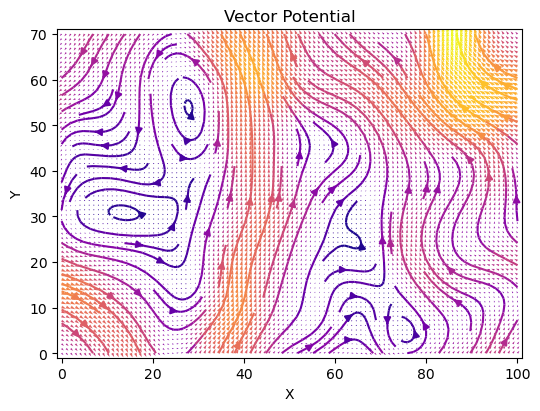

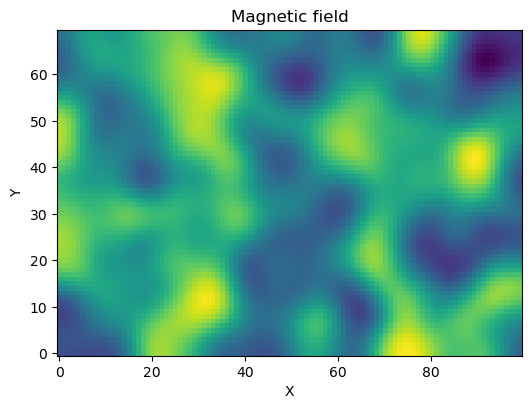

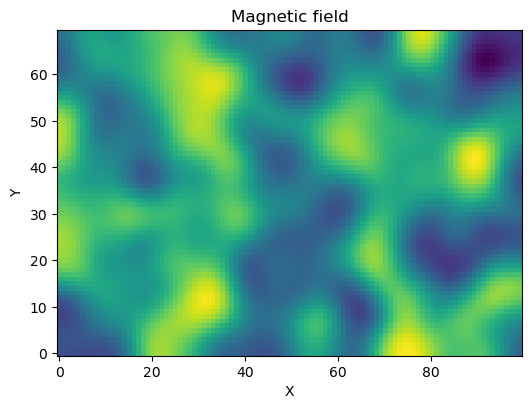

In [4]:
nx = 100
ny = 70
uniform = 2*pi/(nx*ny) #One flux quantum in the system
noise = 100*uniform


fluxes = uniform*np.ones((ny,nx))+noise*(np.random.rand(ny,nx)-np.ones((ny,nx))/2)
fluxes = gaussian_filter(fluxes, sigma=np.sqrt(nx*ny)/20)

a_e, a_n = mb.vector_potential(nx,ny,fluxes, gauge = "C4")

mb.plot_A(a_e,a_n)
recover_flux = mb.recover_field(a_e,a_n)
print(np.max(fluxes- recover_flux))
mb.plot_B(fluxes)
mb.plot_B(recover_flux)

# Rectangle

Text(0.5, 1.0, 'Lattice')

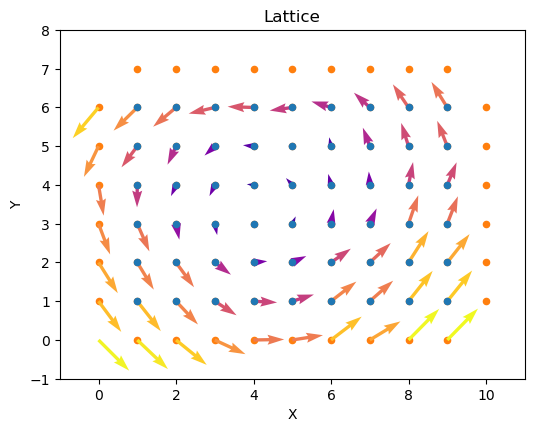

In [4]:
Lx = 10
Ly = 7
fluxes = np.random.rand(Ly,Lx)/1000
a_e, a_n = mb.vector_potential(Lx,Ly,fluxes, gauge = "C4")

parameters = dict(
    Lx = Lx,
    Ly = Ly,
    theta = 0,
    a_e = a_e,
    a_n = a_n,
    mass = 0
)

Phi, H, P, deleted_indices, spinup_shape, spindown_shape = mb.operators_rectangle(parameters, return_shape = True)

fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111)
# Define a grid of points
x = np.linspace(0, Lx-1, Lx) 
y = np.linspace(0, Ly-1, Ly)  
X, Y = np.meshgrid(x, y)    # Create a meshgrid for plotting
ax.quiver(X, Y, a_e[:-1,:], a_n[:,:-1],np.sqrt(a_e[:-1,:]**2 + a_n[:,:-1]**2),cmap="plasma") #The right and top edges are left out of the plot
ax.scatter(spinup_shape[0],spinup_shape[1], s = 20)
ax.scatter(spindown_shape[0],spindown_shape[1], s = 20,zorder=-1)
#ax.imshow(fluxes,extent=[0, Lx, 0, Ly],zorder = -2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(-1,Lx+1)
ax.set_ylim(-1,Ly+1)
ax.set_aspect('equal')
ax.set_title('Lattice')

[20, 21, 25, 40, 50, 57, 67, 80]
0
1
2
3
4
5
6
7


Text(0.5, 1.0, 'First five eigenvalues with $m = 1$')

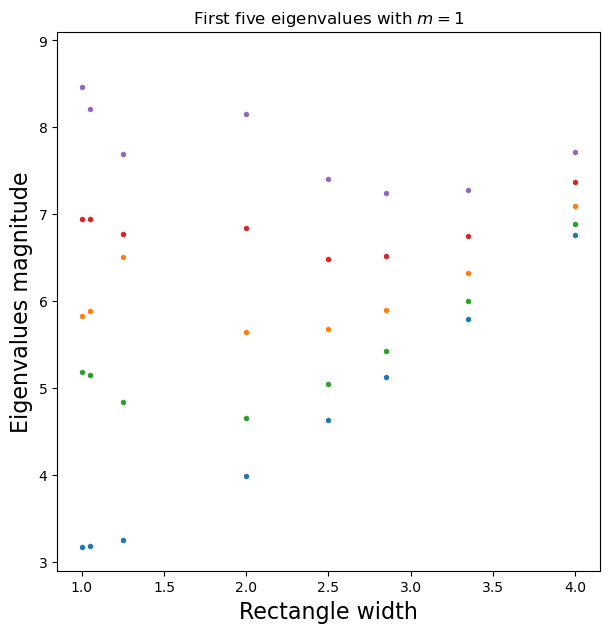

In [3]:
scale_factor = 20

area = scale_factor*scale_factor 
nbands = 10
parameters = dict()
parameters['theta'] = -pi/2
parameters['mass'] = 1/scale_factor

flux_quanta = 0
magnetic_field = 2*pi/area*flux_quanta


sides = [x for x in range(scale_factor,5*scale_factor,1) if abs(x*round(scale_factor**2/x)/(scale_factor**2)-1)<0.005]
print(sides)

spectrum = np.zeros((len(sides),nbands))
for i,side in enumerate(sides):
    print(i)
    Lx = side
    Ly = round(area/Lx)
    parameters['Lx'] = Lx
    parameters['Ly'] = Ly
    fluxes = magnetic_field*np.ones((Ly,Lx))
    a_e, a_n = mb.vector_potential(Lx,Ly,fluxes, gauge = "C4")
    parameters['a_e'] = a_e
    parameters['a_n'] = a_n
    
    ener, states, degenerate_indices = mb.solve_eigenproblem_rectangle(parameters, number_of_bands = nbands, plot_shape=False)
    spectrum[i] = np.sort(ener)

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111)
colors = ['C0','C0','C0','C0','C0','C0','C2','C1','C3','C4']
for i in range(nbands):
    ax.scatter(np.array(sides)/scale_factor,scale_factor*spectrum[:,i],c = colors[i], s = 10, marker = 'h')
ax.set_ylim(2.9,9.1)
ax.set_xlabel('Rectangle width', fontsize = 16)
ax.set_ylabel('Eigenvalues magnitude', fontsize = 16)
ax.set_title(r'First five eigenvalues with $m = 1$', fontsize = 12)

# Ribbon